<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она работает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров другого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Информация для Kaggle Competition

- Ник на Kaggle: **danon2018**.
- Team name на Kaggle: **Даниил_Востриков**

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Пока можно заметить следующее: `TotalSpent` - это числовой признак, однако в датафрейме он имеет тип `object`, `IsSeniorCitizen` - категориальный признак, однако в датафрейме он имеет тип `int64`. Исправим это:

In [5]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce', downcast='float')
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype(str)
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace({'0': 'No', '1': 'Yes'})

In [6]:
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.349976,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.199951,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.900002,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.000000,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.450195,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Из выведенной таблицы видно, что есть много текстовых строк, где вместо `Nan` могут использоваться какие-то слова/словосочетания(например, Not found и т.д.). Посмотрим на уникальные значения в каждом столбце, и при необходимости заменим соответствующие словосочетания на значение `Nan`.

In [7]:
print('Sex:', data['Sex'].unique())
print('IsSeniorCitizen:', data['IsSeniorCitizen'].unique())
print('HasPartner:', data['HasPartner'].unique())
print('HasPhoneService:', data['HasPhoneService'].unique())
print('HasMultiplePhoneNumbers:', data['HasMultiplePhoneNumbers'].unique())
print('HasOnlineSecurityService:', data['HasOnlineSecurityService'].unique())
print('HasInternetService:', data['HasInternetService'].unique())
print('HasOnlineBackup:', data['HasOnlineBackup'].unique())
print('HasDeviceProtection:', data['HasDeviceProtection'].unique())
print('HasTechSupportAccess:', data['HasTechSupportAccess'].unique())
print('HasOnlineTV:', data['HasOnlineTV'].unique())
print('HasMovieSubscription:', data['HasMovieSubscription'].unique())
print('HasContractPhone:', data['HasContractPhone'].unique())
print('IsBillingPaperless:', data['IsBillingPaperless'].unique())
print('PaymentMethod:', data['PaymentMethod'].unique())

Sex: ['Male' 'Female']
IsSeniorCitizen: ['No' 'Yes']
HasPartner: ['Yes' 'No']
HasPhoneService: ['Yes' 'No']
HasMultiplePhoneNumbers: ['No' 'Yes' 'No phone service']
HasOnlineSecurityService: ['No internet service' 'No' 'Yes']
HasInternetService: ['No' 'Fiber optic' 'DSL']
HasOnlineBackup: ['No internet service' 'No' 'Yes']
HasDeviceProtection: ['No internet service' 'No' 'Yes']
HasTechSupportAccess: ['No internet service' 'Yes' 'No']
HasOnlineTV: ['No internet service' 'No' 'Yes']
HasMovieSubscription: ['No internet service' 'No' 'Yes']
HasContractPhone: ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless: ['No' 'Yes']
PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


В колонках `HasMultiplePhoneNumbers`, `HasOnlineSecurityService`, `HasOnlineBackup`, `HasDeviceProtection`, `HasTechSupportAccess`, `HasOnlineTV`, `HasMovieSubscription` присутствуют значения `No phone service'`(соответствует значению `No` в колонке `HasPhoneService`) и `No internet service`(соответствует значению `No` в колонке `HasInternetService`), что является дублированием. Заменим все такие значения на просто `No`:

In [8]:
data['HasMultiplePhoneNumbers'] = data['HasMultiplePhoneNumbers'].replace('No phone service', 'No')
data['HasOnlineSecurityService'] = data['HasOnlineSecurityService'].replace('No internet service', 'No')
data['HasOnlineBackup'] = data['HasOnlineBackup'].replace('No internet service', 'No')
data['HasDeviceProtection'] = data['HasDeviceProtection'].replace('No internet service', 'No')
data['HasTechSupportAccess'] = data['HasTechSupportAccess'].replace('No internet service', 'No')
data['HasOnlineTV'] = data['HasOnlineTV'].replace('No internet service', 'No')
data['HasMovieSubscription'] = data['HasMovieSubscription'].replace('No internet service', 'No')

Выведем теперь диаграмму, показывающую количество пропущенных значений для каждого признака:

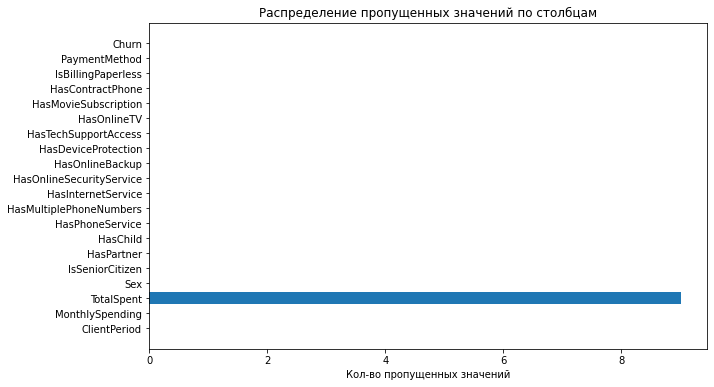

In [9]:
plt.figure(figsize=(10,6))
plt.title('Распределение пропущенных значений по столбцам')
plt.xlabel('Кол-во пропущенных значений')
plt.barh(data.isna().sum().index, data.isna().sum().values)

None

Видим, что только в столбце `TotalSpent` есть 9 значений nan. Посмотрим на эти объекты:

In [10]:
data[data['TotalSpent'].isna() == True]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,No,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,No,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,No,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,No,Yes,Yes,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,No,Yes,Yes,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Видно, что это те люди, которые только начинают пользоваться услугами телеком-компании(`ClientPeriod` = 0). Проверим эту теорию:

In [11]:
data[data['ClientPeriod'] == 0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,No,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,No,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,No,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,No,Yes,Yes,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,No,Yes,Yes,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Теория подтверждена. Поэтому логичнее всего будет удалить данные объекты, так как они не отражают сути проблемы, ведь мы не можем судить об оттоке клиентов, которые только начинают пользоваться сервисом:

In [12]:
data = data[data['TotalSpent'].isna() == False]

Теперь с данными можно полноценно работать.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, если вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [13]:
import seaborn as sns

#### 1) Распределение численных признаков

In [14]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

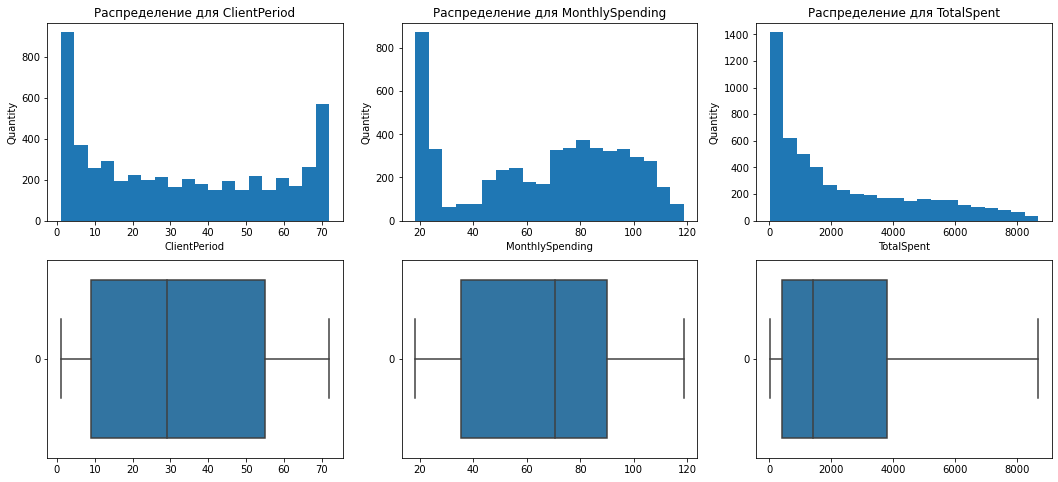

In [15]:
fig, ax = plt.subplots(2, 3, figsize = (18,8))

ax[0,0].hist(data['ClientPeriod'], bins=20)
ax[0,0].set_title('Распределение для ClientPeriod')
ax[0,0].set_xlabel('ClientPeriod')
ax[0,0].set_ylabel('Quantity')

ax[0,1].hist(data['MonthlySpending'], bins=20)
ax[0,1].set_title('Распределение для MonthlySpending')
ax[0,1].set_xlabel('MonthlySpending')
ax[0,1].set_ylabel('Quantity')

ax[0,2].hist(data['TotalSpent'], bins=20)
ax[0,2].set_title('Распределение для TotalSpent')
ax[0,2].set_xlabel('TotalSpent')
ax[0,2].set_ylabel('Quantity')

sns.boxplot(data=data['ClientPeriod'], orient='h', ax=ax[1,0])
sns.boxplot(data=data['MonthlySpending'], orient='h', ax=ax[1,1])
sns.boxplot(data=data['TotalSpent'], orient='h', ax=ax[1,2])

None

Из полученных графиков выбросов по численным признакам выявлено не было.

#### 2) Распределение категориальных признаков 

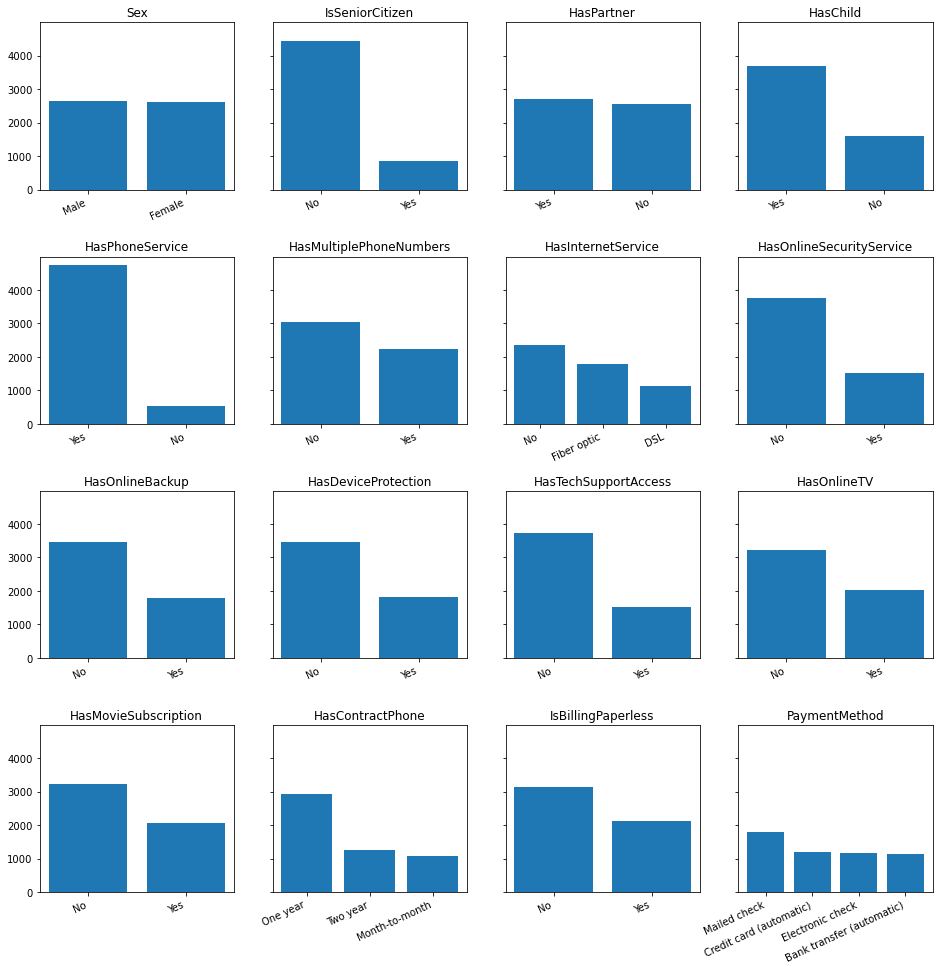

In [16]:
fig, ax = plt.subplots(4,4, figsize=(16,16), sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i in range(4):
    for j in range(4):
        col = np.array(cat_cols).reshape(4,4)[i,j]
        ax[i,j].bar(data[col].unique().astype(str), height=data[col].value_counts())
        ax[i,j].set_title(col)
        plt.setp(ax[i,j].get_xticklabels(), rotation=25, ha='right')

Почти по всем категориальным признакам видно довольно равномерное распределение, кроме:

1) в датасете довольно мало пожилых людей, около 20% от общего числа(признак `IsSeniorCitizen`).<br>
2) в датасете мало людей, у которых нет телефонного сервиса, около 10% от общего числа(признак `HasPhoneService`).

#### 3) Распределение целевой переменной

In [17]:
target_col

'Churn'

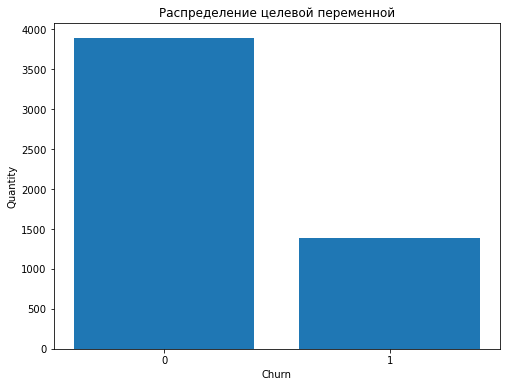

In [18]:
plt.figure(figsize=(8,6))
plt.bar(data['Churn'].unique().astype(str), height=data['Churn'].value_counts())
plt.title('Распределение целевой переменной')
plt.ylabel('Quantity')
plt.xlabel('Churn')


None

Большого дисбаланса в распределении классов не выявлено(количество элементов класса **0** примерно в 3 раза больше чем элементов класса **1**). Однако при оценке качества моделей все равно будет использоваться метрика `ROC-AUC`.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно использовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа превращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc

Разделим данные на матрицу с фичами и столбец с таргетами:

In [20]:
X = data.copy()
X = X.drop(columns=['Churn'])
y = data['Churn'].copy()

Сделаем one-hot-encoding с помощью функции `pd.get_dummies`:

In [21]:
X_dum = pd.get_dummies(X, drop_first=True)

Теперь нормализуем данные с помощью `StandartScaler`:

In [22]:
normalizer = StandardScaler()
X_norm = normalizer.fit_transform(X_dum)

In [23]:
X = np.array(X_norm)
y = np.array(y)

Разделим всю выборку на тренировочную и валидационную части:

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

Теперь можно приступать к обучению моделей.

1) Получим лучшие параметры для линейной модели c помощью `GridSearchCV`:

In [25]:
lr = LogisticRegression(multi_class='multinomial', penalty='l2', solver='saga', tol=1e-3, max_iter=500)
params = {
    'C': [100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
    'fit_intercept': [True, False]
}

cv = GridSearchCV(lr, param_grid = params, n_jobs = -2, scoring='roc_auc')
cv.fit(X_train, y_train)
cv.best_params_

{'C': 5, 'fit_intercept': True}

In [26]:
lr_clf = LogisticRegression(multi_class='multinomial', 
                         penalty='l2', solver='saga',
                         tol=1e-3, max_iter=500,
                         C=5, fit_intercept=True)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_valid)
y_pred_proba = lr_clf.predict_proba(X_valid)

ROC-AUC score for LogisticRegression: 0.8372117705818697


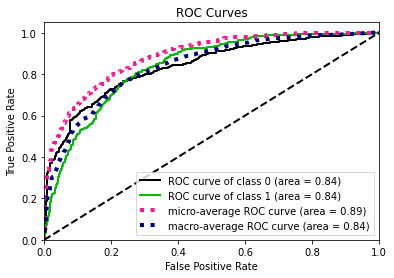

In [27]:
plot_roc(y_valid, y_pred_proba)
print('ROC-AUC score for LogisticRegression:', roc_auc_score(y_valid, y_pred_proba[:,1]))

Лучший результат для `LogisticRegression`:
- Гиперпараметры: `C`=5, `fit_intercept`=True. 
- ROC-AUC score: 0.8372.

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметра количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [28]:
from catboost import CatBoostClassifier

In [29]:
X = data.copy()
X = X.drop(columns=['Churn'])
y = data['Churn'].copy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

#### 1) Протестируем `CatBoostClassifier` со стандартными параметрами

In [30]:
standart_catboost_clf = CatBoostClassifier(verbose=0)

standart_catboost_clf.fit(X_train, y_train, cat_features=cat_cols)
y_pred = standart_catboost_clf.predict(X_valid)
y_pred_proba = standart_catboost_clf.predict_proba(X_valid)

ROC-AUC score: 0.8339496795138599


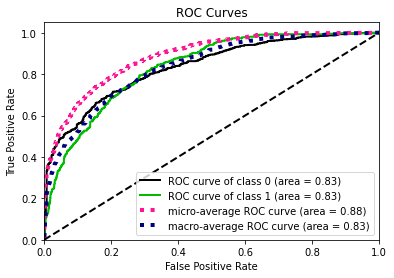

In [31]:
plot_roc(y_valid, y_pred_proba)
print('ROC-AUC score:', roc_auc_score(y_valid, y_pred_proba[:,1]))

#### 2) Теперь попробуем подобрать наулучшие гиперпараметры и посмотрим на качество модели с этими гиперпараметрами

In [32]:
catboost = CatBoostClassifier(verbose=0)

params = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_trees': [100, 1000, 2000, 4000, 6000]
}

cv = GridSearchCV(catboost, param_grid = params, n_jobs = -2, scoring='roc_auc')
cv.fit(X_train, y_train, cat_features=cat_cols)
cv.best_params_

{'learning_rate': 0.001, 'num_trees': 6000}

In [33]:
catboost_clf = CatBoostClassifier(learning_rate=0.001, num_trees=6000, verbose=0)

catboost_clf.fit(X_train, y_train, cat_features=cat_cols)
y_pred = catboost_clf.predict(X_valid)
y_pred_proba = catboost_clf.predict_proba(X_valid)

ROC-AUC score for CatBoost: 0.8366530009156747


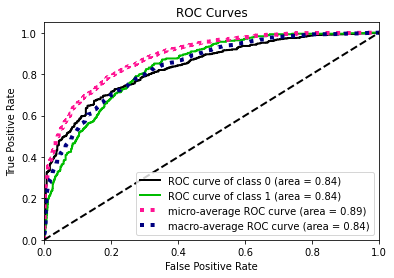

In [34]:
plot_roc(y_valid, y_pred_proba)
print('ROC-AUC score for CatBoost:', roc_auc_score(y_valid, y_pred_proba[:,1]))

Лучший результат для `CatBoost`:
- Гиперпараметры: `learning_rate`=0.001, `num_trees`=6000. 
- ROC-AUC score: 0.8367.

# Предсказания

In [35]:
best_model = catboost_clf

In [36]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [37]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

# Результаты

По итогу, на сайте `Kaggle` был получен **score**=0.85015:

<img src='./result.png' style="height: 500px">